In [3]:
import tweepy
import configparser

In [4]:
import pandas as pd
import re

In [5]:
config = configparser.ConfigParser()

In [6]:
config.read('config.ini')

['config.ini']

In [7]:
api_key = config['twitter']['api_key']

api_key_secret = config['twitter']['api_key_secret']

#bearer_token = config['twitter']['bearer_token']

access_token = config ['twitter']['access_token']

access_token_secret = config['twitter']['access_token_secret']

In [8]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline(count=100)

In [9]:
columns = ['Time', 'User', 'Tweet']
data = []
for tweet in public_tweets:
    data.append([tweet.created_at, tweet.user.screen_name, tweet.text])

df = pd.DataFrame(data, columns=columns)

df.to_csv('tweets.csv')

In [10]:
public_tweets[0].user.screen_name

'bazza080808'

In [11]:
#public_tweets[0]

In [12]:
#df.tail()

In [13]:
def clean_text(text):
    text = re.sub('@[a-zA-Z0-9]+','',text)
    text = re.sub('#','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)','',text)
    return text

In [14]:
df['Tweet']=df['Tweet'].apply(clean_text)

In [15]:
#df.tail()

In [16]:
from textblob import TextBlob

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
from wordcloud import WordCloud

In [19]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity


In [20]:
df['Subjectivity'] = df['Tweet'].apply(get_subjectivity)
df['Polarity'] = df['Tweet'].apply(get_polarity)

In [34]:
df.Polarity.head()

0    0.000
1    0.400
2   -0.125
3    0.250
4    0.000
Name: Polarity, dtype: float64

In [22]:
all_words = " ".join([twee for twee in df['Tweet']])

In [23]:
word_cloud = WordCloud(width = 500, height = 300, random_state = 2, max_font_size = 100).generate(all_words)

(-0.5, 499.5, 299.5, -0.5)

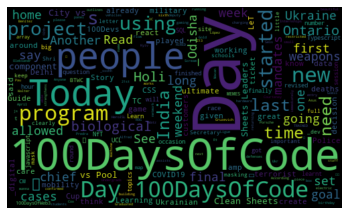

In [24]:
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')

In [25]:
def get_analysis(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [26]:
df['Analysis'] = df['Polarity'].apply(get_analysis)

In [35]:
df.Analysis.tail()

93    negative
94     neutral
95     neutral
96     neutral
97    positive
Name: Analysis, dtype: object

In [36]:
#df[df['Analysis'] == 'negative'].head()

In [29]:
#df.Tweet[11]

'VC panel outlines strategic opportunities for mobility startups at TC Sessions: Mobility '

In [30]:
#sorted_df = df.sort_values(by =['Polarity'])

In [37]:
#sorted_df.tail()

In [32]:
sorted_df.to_csv('sentiment.csv')

In [33]:
sorted_df.to_html('sentiment.html')